<a href="https://colab.research.google.com/github/austinAbraham/CE888/blob/development/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import sklearn

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

df_dummies = pd.get_dummies(df, columns=categorical_features ).drop('duration', axis =1).dropna(axis=0)

df_dummies[['y']] =  df_dummies[['y']].apply(LabelEncoder().fit_transform)

x_df =df_dummies.drop("y", axis=1)
y_df =df_dummies["y"]

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(x_df, y_df, random_state=50, test_size=.2, stratify=y_df)

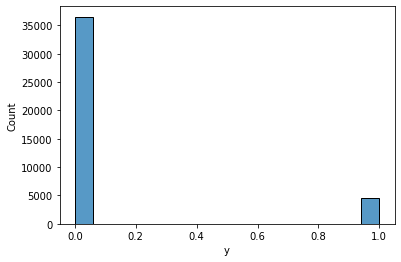

In [4]:
#plotting the imbalance in data

sns.histplot(data = df_dummies, x= "y")


In [5]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=50).fit(X_train, Y_train)

scores = cross_val_score(model, X_test, Y_test, cv=10, scoring='f1')
print("Initial : "+str(scores))

#Compare the results of your classifier with that of a dummy classifier.
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train,Y_train)

scores = cross_val_score(dummy_clf, X_test, Y_test, cv=10, scoring='f1')
print("Dummy : "+str(scores))


Initial : [0.17857143 0.3902439  0.26548673 0.29059829 0.29059829 0.28813559
 0.37704918 0.19298246 0.29090909 0.29565217]
Dummy : [0.09944751 0.09142857 0.10344828 0.13043478 0.11494253 0.14778325
 0.15873016 0.10465116 0.17592593 0.11428571]


In [6]:
# Number of trees in random forest
n_estimators = [80, 100, 120]

# Maximum number of levels in tree
max_depth = [5, 10, 20]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
              #  'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'random_state':[50]
              #  'bootstrap': bootstrap
              }

print(param_grid)

{'n_estimators': [80, 100, 120], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2], 'random_state': [50]}


In [7]:

clf = GridSearchCV(RandomForestClassifier(), param_grid)
clf.fit(X_train, Y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [8]:
clf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 120,
 'random_state': 50}

In [9]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [10]:
model_best = RandomForestClassifier(max_depth=10, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100).fit(X_train, Y_train)


In [11]:
initial_model_scores = cross_val_score(model, X_train, Y_train, random_state=50, scoring='accuracy')
best_model_scores = cross_val_score(model_best, X_train, Y_train, random_state=50, scoring='accuracy')
print("Cross Val for initial model :"+ str(sum(initial_model_scores)/len(initial_model_scores)))
print("Cross Val for optimised model :"+ str(sum(best_model_scores)/len(best_model_scores)))

TypeError: ignored

In [18]:
rfecv = RFECV(estimator=model_best, 
              step=1, 
              cv=5, 
              scoring = 'roc_auc')
rfecv.fit(X_train, Y_train)
rfecv
rfecv.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  7, 12, 40, 36, 30, 13, 25, 27,
       23,  3, 34, 38, 28, 15,  4, 42, 26, 32, 19, 11, 43, 18,  1, 24, 14,
       21, 44,  6, 41, 16,  8, 37, 22,  1,  1,  9, 29, 39, 31, 20,  1,  1,
       35,  1, 33,  5,  1,  1, 10, 17,  1,  2,  1])

In [19]:
rfecv.ranking_
best_features = list(np.where(rfecv.ranking_ == 1))

In [21]:
cols = X_train.columns
top = cols[best_features]
print("Top features are : "+ top[:3])

Index(['Top features are : age', 'Top features are : campaign',
       'Top features are : pdays'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [22]:
model_quiz_6 = RandomForestClassifier(n_estimators=400, max_depth=6, random_state=50).fit(X_train, Y_train)

scores = cross_val_score(model, X_test, Y_test, cv=10, scoring='f1')
print("Initial : "+str(round(sum(scores)/len(scores), 2)))

Initial : 0.29


In [23]:
model_quiz_6 = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=50).fit(X_train, Y_train)

scores = cross_val_score(model, X_test, Y_test, cv=10, scoring='f1')
print("Initial : "+str(round(sum(scores)/len(scores), 2)))

Initial : 0.29
